In [2]:
import numpy as np
import matplotlib.pyplot as plt

from casadi_trajectory_optimization.planar_quadrotor_dynamics import PlanarQuadrotorDynamics
from casadi_trajectory_optimization.multi_agent_optimization import MultiAgentOptimization

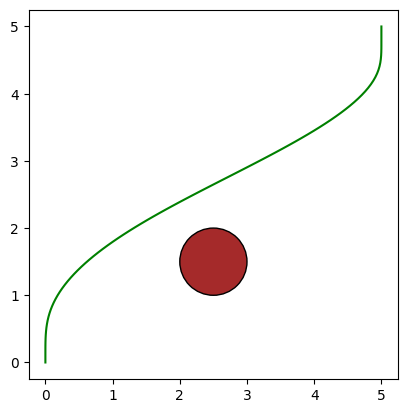

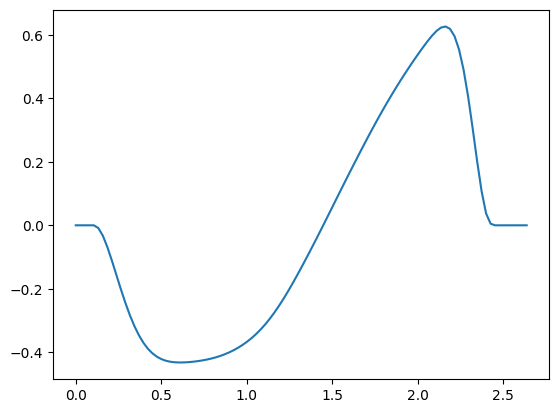

In [13]:
quadrotor = PlanarQuadrotorDynamics()
deg2rad = np.pi/180
x_bounds = np.array([
    [-20., 20.],
    [-20., 20.],
    [-np.pi/4, np.pi/4.],
    [-5, 5],
    [-2, 2],
    [-np.inf, np.inf]
])
u_bounds = np.array([
    [0, 20],
    [0, 20]
])

planner = MultiAgentOptimization(quadrotor, 1, 100)
x0 = np.array([[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]])
xf = np.array([[5.0, 5.0, 0.0, 0.0, 0.0, 0.0]])
planner.add_obstacle([2.5, 1.5], 0.5)

planner.setup_min_time_opt(x0, xf, x_bounds=x_bounds, u_bounds=u_bounds)
x, u, tf = planner.solve_opt()

planner.draw_path()
fig, ax = plt.subplots()
x = planner.x_sol
tf = planner.tf_sol
for i in range(planner.M):
    ax.plot(np.arange(x[i].shape[1])*tf/x[i].shape[1], x[i][2,:])

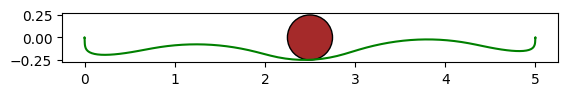

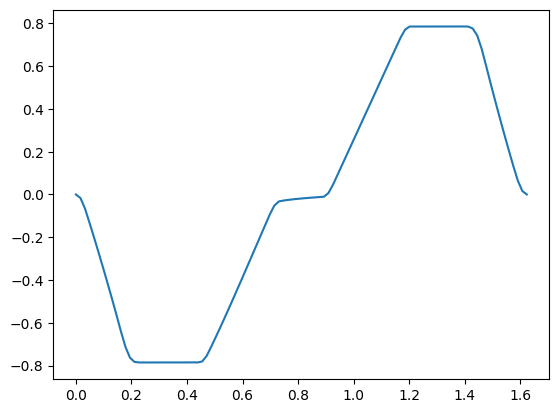

In [9]:
quadrotor = PlanarQuadrotorDynamics()
deg2rad = np.pi/180
x_bounds = np.array([
    [-20., 20.],
    [-20., 20.],
    [-np.pi/4, np.pi/4.],
    [-5, 5],
    [-2, 2],
    [-np.inf, np.inf]
])
u_bounds = np.array([
    [0, 20],
    [0, 20]
])

planner = MultiAgentOptimization(quadrotor, 1, 100)
x0 = np.array([[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]])
xf = np.array([[5.0, 0.0, 0.0, 0.0, 0.0, 0.0]])
planner.add_obstacle([2.5, 0.0], .25)

planner.setup_min_time_opt(x0, xf, x_bounds=x_bounds, u_bounds=u_bounds)
x, u, tf = planner.solve_opt()

planner.draw_path()
fig, ax = plt.subplots()
x = planner.x_sol
tf = planner.tf_sol
for i in range(planner.M):
    ax.plot(np.arange(x[i].shape[1])*tf/x[i].shape[1], x[i][2,:])